In [9]:
#imports
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
d_crime=pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [7]:
d_crime.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",1.407340e+13
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",1.407360e+13


In [10]:
sns.set_style("whitegrid")
sns.despine()

# First we plot the number of crimes per type - in this figure we see the number of crimes per category

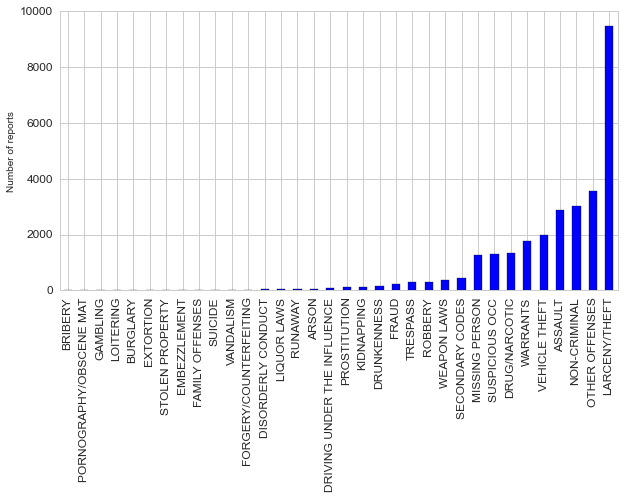

In [13]:
def plotnumberofcrimes(data,cat):
    l=data.groupby(cat).size()
    l.sort()
    fig=plt.figure(figsize=(10,5))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='b')
    plt.xlabel('')
    plt.ylabel('Number of reports',fontsize=10)

plotdat(d_crime,'Category')

    adding street corner column

In [16]:
d_crime['street_corner'] = d_crime['Address'].apply(lambda x: 1 if '/' in x else 0)

In [17]:
crime_categories = d_crime['Category'].unique()
n_crime_categories = crime_categories.shape[0]
street_corner_percentages = np.zeros((2,n_crime_categories+1))

Adding interesting analysis on what precentage of crimes happens on street coreners (Idea from kaggle)

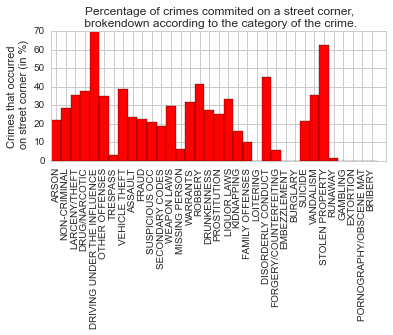

In [36]:
for n in np.arange(n_crime_categories):
    if 0 in d_crime['street_corner'].loc[d_crime['Category'] == crime_categories[n]].value_counts().keys():
        street_corner_percentages[0,n] = d_crime['street_corner'].loc[d_crime['Category'] == crime_categories[n]].value_counts()[0]
    if 1 in d_crime['street_corner'].loc[d_crime['Category'] == crime_categories[n]].value_counts().keys():
        street_corner_percentages[1,n] = d_crime['street_corner'].loc[d_crime['Category'] == crime_categories[n]].value_counts()[1]
street_corner_percentages[:,-1] = np.sum(street_corner_percentages, axis=1)
street_corner_percentages = 100.0*(street_corner_percentages/np.sum(street_corner_percentages, axis=0))

# Plot the bar chart of percentages of crimes that occured on street corners
ind = np.arange(n_crime_categories)
width = 1.0
crimes_list = list(crime_categories)
fig, axarr = plt.subplots(1,1)
rects2 = axarr.bar(ind, street_corner_percentages[1,:-1], width, color='r')
axarr.set_ylabel('Crimes that occurred \n on street corner (in %)')
axarr.set_title('Percentage of crimes commited on a street corner, \n brokendown according to the category of the crime.')

fig.subplots_adjust(hspace=.5)
crimes_list = list(crime_categories)
axarr.set_xticks(ind+0.5*width)
axarr.set_xticklabels(crimes_list, rotation='vertical')
plt.subplots_adjust(bottom=0.45)